### Visualizing Data with Bar Charts 

Import Libraries and Load the Dataset

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r'D:\New folder (4)\Coursera\DA Capstone\cleaned_survey_data3.csv'

dfo = pd.read_csv(file_path)

dfo.head()    # Display the first five rows

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange,Language,AgeNumeric
0,0,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,JavaScript,40.0
1,1,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Python,40.0
2,2,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Ruby,40.0
3,3,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,Bash/Shell (all shells),40.0
4,4,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,C#,40.0


In [4]:
df = dfo.copy()

##### Visualizing Data Distributions

**Histogram of `ConvertedCompYearly`**

Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.

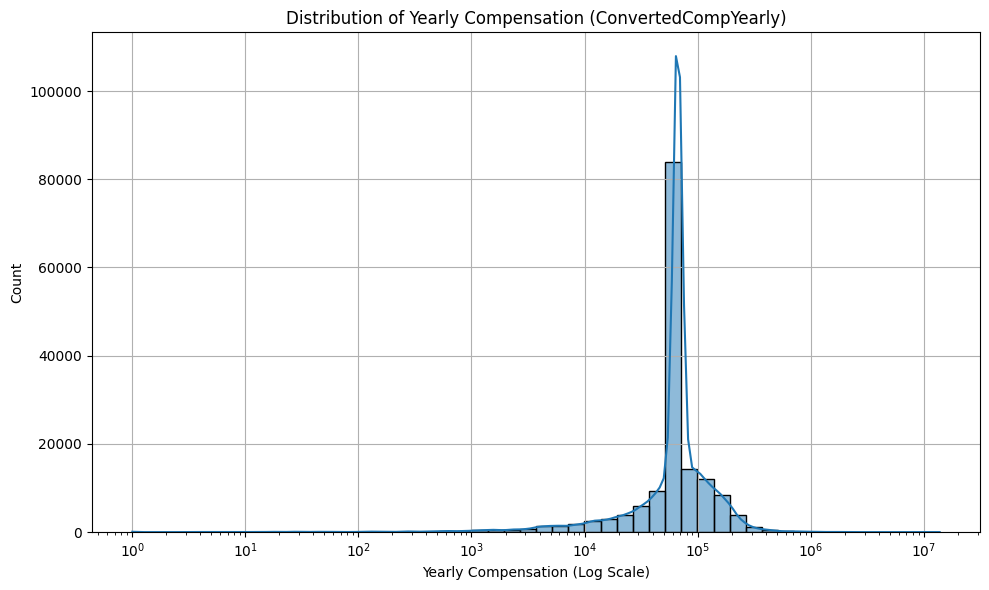

In [ ]:
# Optionally apply a log scale to handle skewness

plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, log_scale=(True, False))  # X-axis log scale
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (Log Scale)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

**Box Plot of `Age`**

Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.

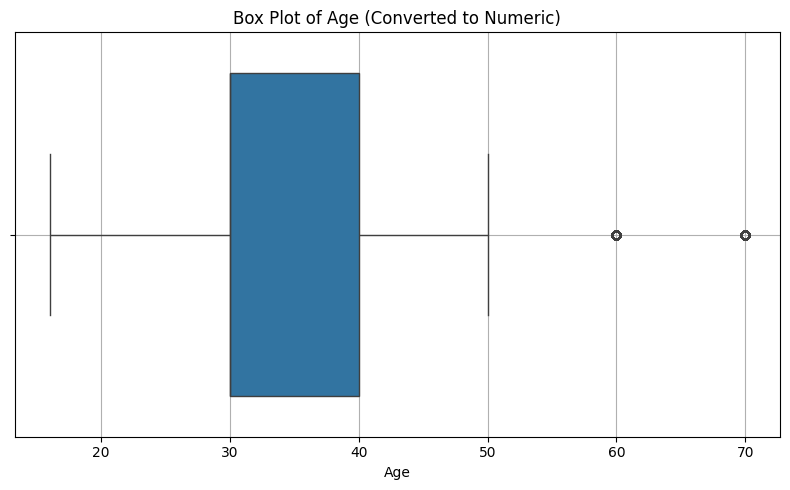

In [6]:
# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AgeNumeric'])    # have already converted age to numeric before
plt.title('Box Plot of Age (Converted to Numeric)')
plt.xlabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Visualizing Relationships in Data

**Scatter Plot of `AgeNumeric` and `ConvertedCompYearly`**

Explore the relationship between age and compensation.

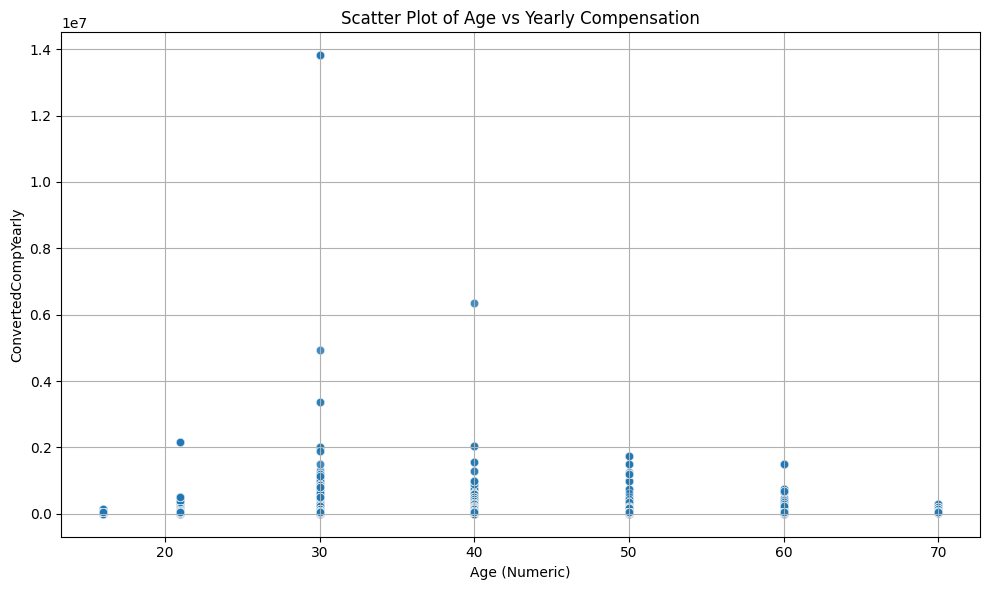

In [7]:
df_scatter = df[['AgeNumeric', 'ConvertedCompYearly']]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='AgeNumeric', y='ConvertedCompYearly', alpha=0.6)
plt.title('Scatter Plot of Age vs Yearly Compensation')
plt.xlabel('Age (Numeric)')
plt.ylabel('ConvertedCompYearly')
plt.grid(True)
plt.tight_layout()
plt.show()

**Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with AgeNu`meric as Bubble Size**

Explore how compensation and job satisfaction are related, with age as the bubble size.

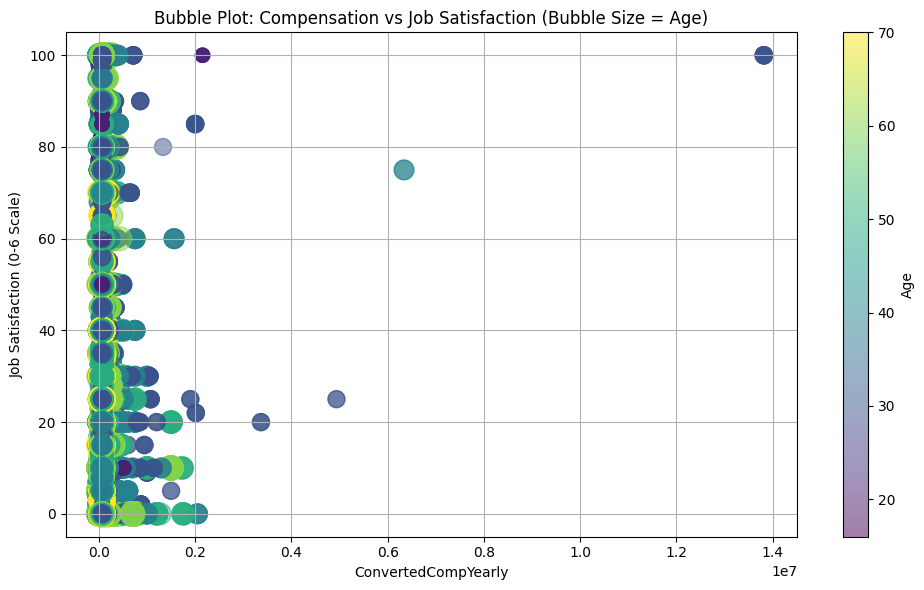

In [8]:
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['AgeNumeric'] * 5,  # scale age for bubble size
    alpha=0.5,
    c=df_bubble['AgeNumeric'],  # color by age (optional)
    cmap='viridis'
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction (0-6 Scale)')
plt.colorbar(label='Age')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Visualizing Composition of Data with Bar Charts

**Horizontal Bar Chart of `MainBranch` Distribution**

Visualize the distribution of respondents’ primary roles to understand their professional focus.

In [9]:
# Count the frequency of each MainBranch category
mainbranch_counts = df['MainBranch'].value_counts().sort_values()

print(mainbranch_counts)

MainBranch
I code primarily as a hobby                                                                 494
I am learning to code                                                                       622
I used to be a developer by profession, but no longer am                                   1985
I am not primarily a developer, but I write code sometimes as part of my work/studies     10037
I am a developer by profession                                                           143939
Name: count, dtype: int64


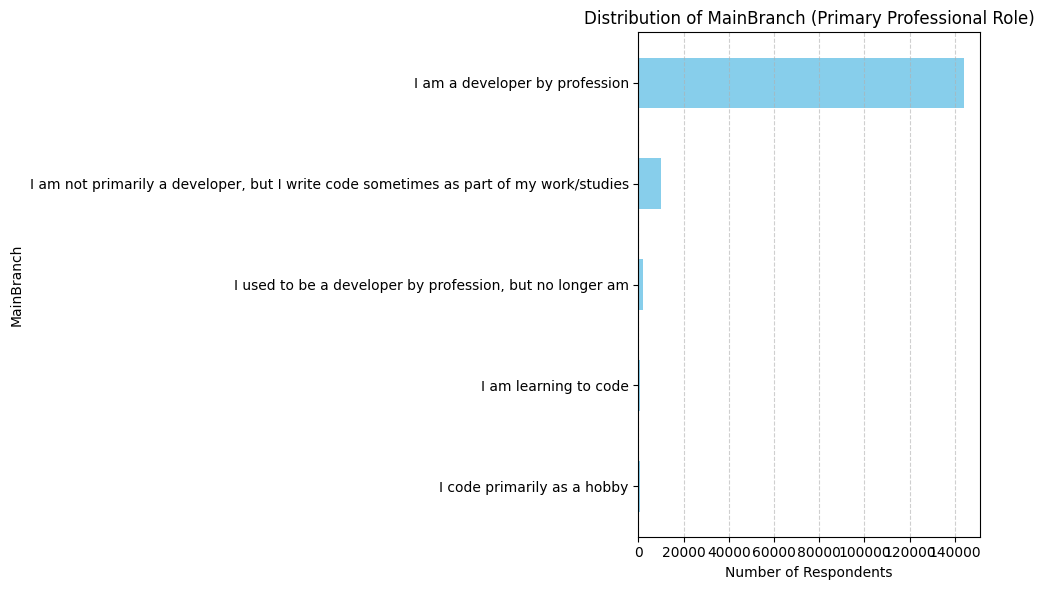

In [10]:
# Plot horizontal bar chart

plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Respondents')
plt.title('Distribution of MainBranch (Primary Professional Role)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With**

Identify the most desired programming languages based on `LanguageWantToWorkWith`.

In [11]:
# Split multi-valued responses into separate entries
all_langs = df['LanguageWantToWorkWith'].dropna().str.split(';').explode().str.strip()

# Count and get the top 5 languages
top_langs = all_langs.value_counts().head(5)

print(top_langs)

LanguageWantToWorkWith
SQL           75446
Python        71898
JavaScript    71327
TypeScript    67961
HTML/CSS      66591
Name: count, dtype: int64


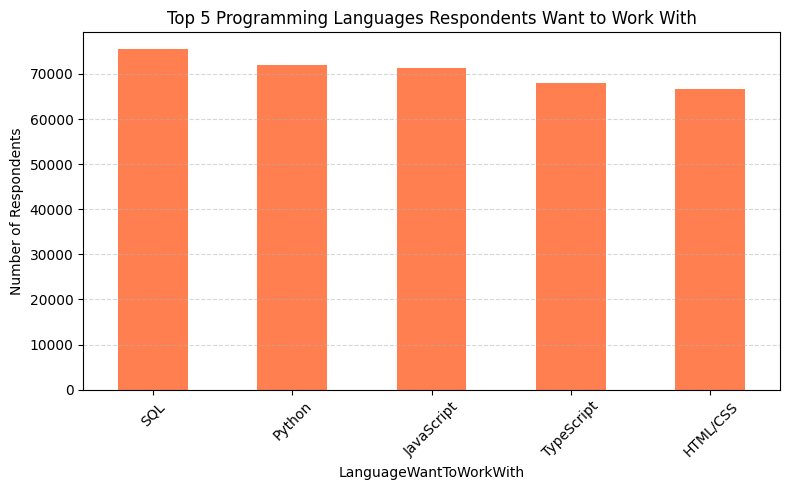

In [12]:
# Plot vertical bar chart

plt.figure(figsize=(8, 5))
top_langs.plot(kind='bar', color='coral')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by `Age` Group**

Compare job satisfaction metrics across different age groups with a stacked bar chart.

In [14]:
# Calculate median satisfaction scores by age group
median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

print(median_satisfaction)

                    JobSatPoints_6  JobSatPoints_7
Age                                               
18-24 years old               15.0            20.0
25-34 years old               20.0            15.0
35-44 years old               20.0            15.0
45-54 years old               20.0            15.0
55-64 years old               20.0            20.0
65 years or older             20.0            15.0
Prefer not to say             10.0             5.0
Under 18 years old            10.0            10.0


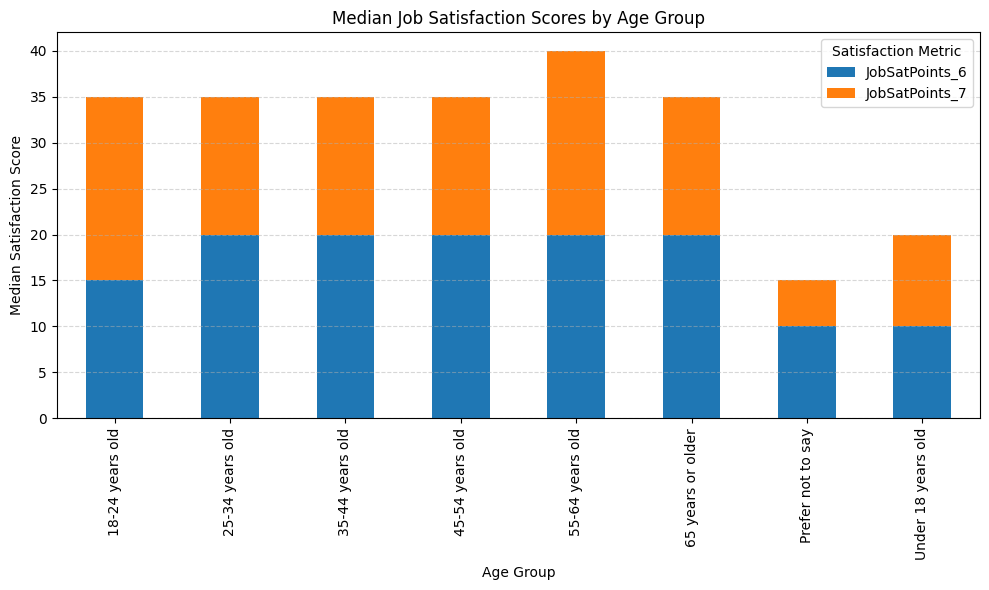

In [15]:
# Plot as stacked bar chart

median_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Satisfaction Metric')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)**

Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.

In [ ]:
# Split the multi-selection string into separate entries
db_series = df['DatabaseHaveWorkedWith'].dropna().str.split(';')  # Or ',' depending on your delimiter

# Flatten the list of lists into a single list
all_dbs = [db.strip() for sublist in db_series for db in sublist]

# Count occurrences
db_counts = pd.Series(all_dbs).value_counts()

# top 10 databases
top_dbs = db_counts.head(10)

print(top_dbs)

PostgreSQL              97142
MySQL                   67226
SQLite                  58916
Microsoft SQL Server    48170
MongoDB                 43446
Redis                   41079
MariaDB                 33794
Elasticsearch           27394
Oracle                  19189
Dynamodb                17068
Name: count, dtype: int64


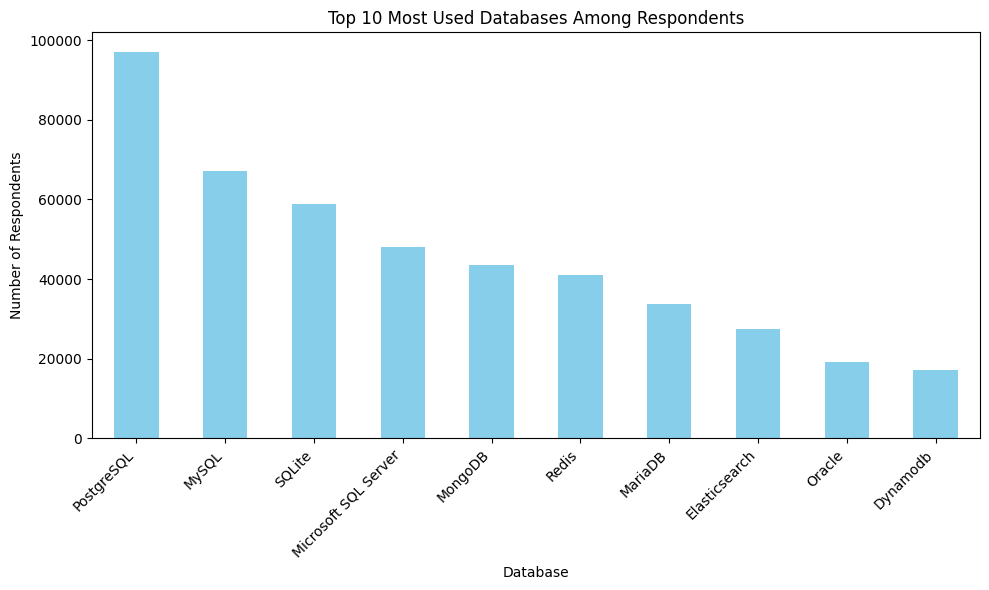

In [17]:
# Plot bar chart

plt.figure(figsize=(10,6))
top_dbs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Used Databases Among Respondents')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Visualizing Comparison of Data with Bar Charts

**Grouped Bar Chart of Median `ConvertedCompYearly` for Different `Age` Groups**

Compare median compensation across multiple age groups with a grouped bar chart.

In [18]:
# Calculate median ConvertedCompYearly per age group
median_comp = df.groupby('Age')['ConvertedCompYearly'].median().dropna()

print(median_comp)

Age
18-24 years old       66616.0
25-34 years old       66616.0
35-44 years old       66616.0
45-54 years old       66616.0
55-64 years old       66616.0
65 years or older     66616.0
Prefer not to say     66616.0
Under 18 years old    66616.0
Name: ConvertedCompYearly, dtype: float64


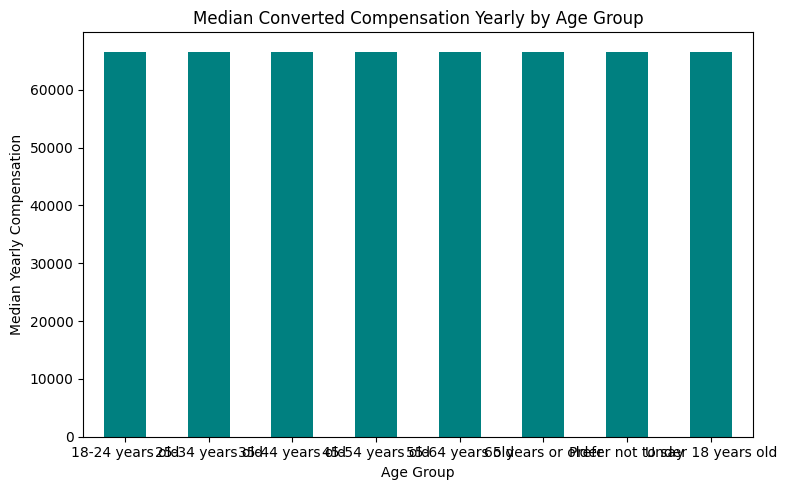

In [22]:
# Plot grouped bar chart (since it's one variable per group, it'll be a simple bar chart)
plt.figure(figsize=(8,5))
median_comp.plot(kind='bar', color='teal')

plt.title('Median Converted Compensation Yearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Bar Chart of Respondent Count by `Country`**

Show the distribution of respondents by country to see which regions are most represented.

In [24]:
# Count respondents per country
country_counts = df['Country'].value_counts()

print(country_counts)

Country
United States of America                                31471
Germany                                                 14374
India                                                    9691
United Kingdom of Great Britain and Northern Ireland     8609
Canada                                                   5522
                                                        ...  
Libyan Arab Jamahiriya                                      4
Central African Republic                                    4
Sierra Leone                                                4
Fiji                                                        2
Burundi                                                     1
Name: count, Length: 166, dtype: int64


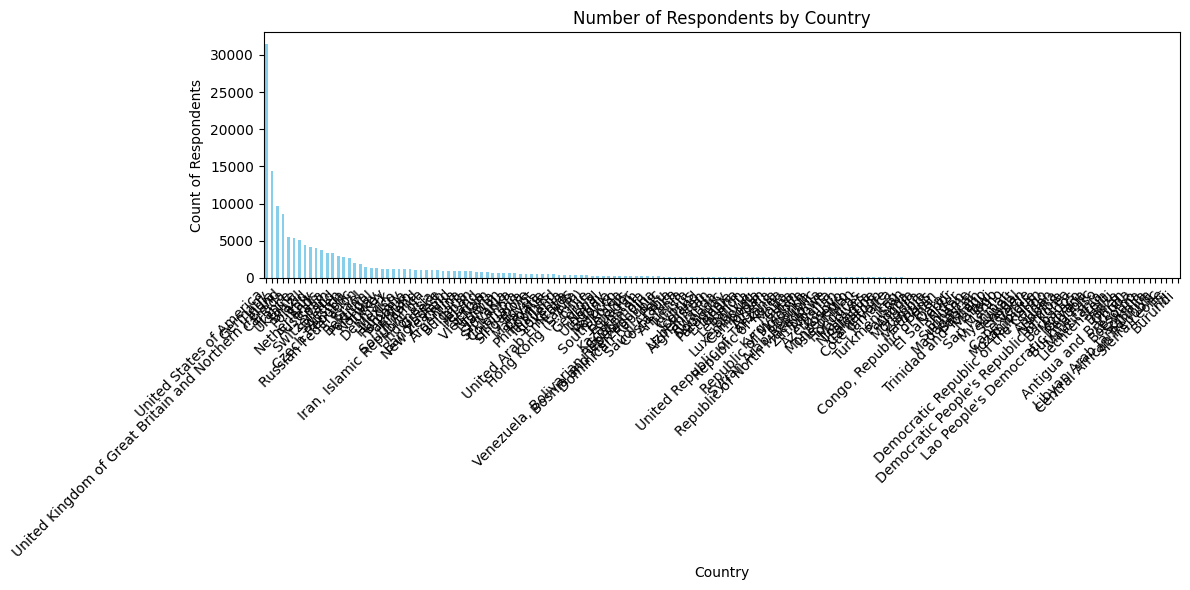

In [25]:
# Plot bar chart
plt.figure(figsize=(12,6))
country_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
